# Problem Statement 
Predict the salary if the employee using the features provided in the data. 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [8]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# check null value

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [23]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

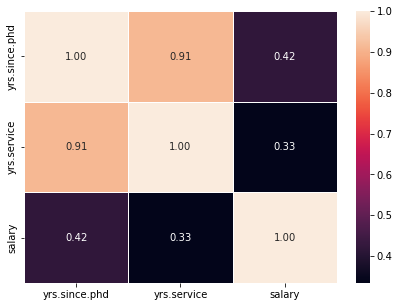

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='white',fmt='.2f')

In [13]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [12]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Data Visualization

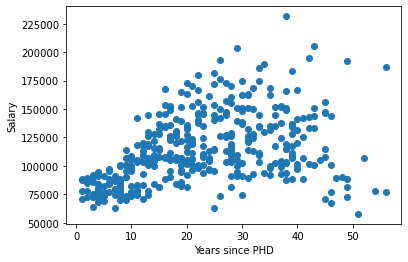

In [16]:
plt.scatter(df['yrs.since.phd'],df['salary'])
plt.xlabel('Years since PHD')
plt.ylabel('Salary')
plt.show()

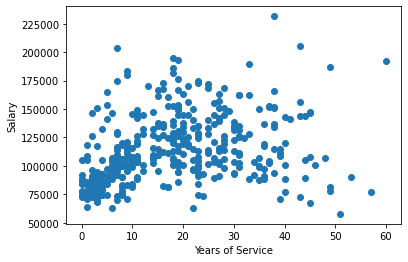

In [17]:
plt.scatter(df['yrs.service'],df['salary'])
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.show()

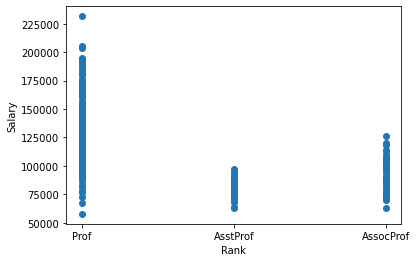

In [18]:
plt.scatter(df['rank'],df['salary'])
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

# Prepare data

In [53]:
x=df.drop('salary',axis=1)
y=df['salary']

In [ ]:
df=df.drop(['rank', 'discipline','sex'],axis=1)
df

In [52]:
df

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [54]:
x.shape,y.shape

((397, 2), (397,))

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((317, 2), (80, 2), (317,), (80,))

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

# Test

In [58]:
pred=lr.predict(x_test)

In [59]:
pred

array([117233.40827102, 101860.95762854,  93454.49959383, 118619.27714089,
       104815.18499926, 109264.47435399, 105963.96768108, 100329.24738611,
       119622.21845015, 105106.86774438, 113075.80166141, 127317.41792073,
       145352.41318879, 122047.6768877 , 113513.32577909, 137237.6378992 ,
       146920.77168963, 126114.03868182, 104486.85399572,  92451.55828457,
        94457.44090309, 103720.99887451,  98232.1199521 , 132514.61409801,
       138349.77232262,  95223.29602431, 120916.84250454, 100329.24738611,
        97320.42345832, 134338.00708557, 107349.83655095, 134994.66909263,
       142069.85481455, 111744.52934861, 109264.47435399, 123633.98368721,
       128940.37297864, 107349.83655095, 116522.14970688, 109355.71916948,
       107058.15380583, 127317.41792073,  93454.49959383, 112127.45690922,
       119622.21845015,  94457.44090309, 106492.73661425, 111744.52934861,
       120296.82875589, 116759.23589493, 124308.59399294, 128411.60404547,
       121245.17350807, 1

In [60]:
y_test

326    124714
54     103760
78      86100
169    181257
367    108413
        ...  
266    143940
69      91412
239     96200
46      98193
50     126621
Name: salary, Length: 80, dtype: int64

In [61]:
diff=y_test-pred

In [62]:
diff

326     7480.591729
54      1899.042371
78     -7354.499594
169    62637.722859
367     3597.815001
           ...     
266    11607.875533
69    -20915.894839
239   -20121.711777
46    -38570.465523
50      9332.995172
Name: salary, Length: 80, dtype: float64

In [63]:
pd.DataFrame(np.c_[y_test,pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,124714.0,117233.408271,7480.591729
1,103760.0,101860.957629,1899.042371
2,86100.0,93454.499594,-7354.499594
3,181257.0,118619.277141,62637.722859
4,108413.0,104815.184999,3597.815001
...,...,...,...
75,143940.0,132332.124467,11607.875533
76,91412.0,112327.894839,-20915.894839
77,96200.0,116321.711777,-20121.711777
78,98193.0,136763.465523,-38570.465523
